<img src="Tarjeta.png">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importar-librerías-y-leer-datos" data-toc-modified-id="Importar-librerías-y-leer-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importar librerías y leer datos</a></span></li><li><span><a href="#Inspecciones-generales" data-toc-modified-id="Inspecciones-generales-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inspecciones generales</a></span><ul class="toc-item"><li><span><a href="#Quitar-missing-values" data-toc-modified-id="Quitar-missing-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Quitar missing values</a></span></li><li><span><a href="#Rellenar-title" data-toc-modified-id="Rellenar-title-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Rellenar <code>title</code></a></span></li><li><span><a href="#Inspección-visual-de-las-reseñas" data-toc-modified-id="Inspección-visual-de-las-reseñas-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Inspección visual de las reseñas</a></span></li><li><span><a href="#Palabras-más-comunes-de-acuerdo-al-sentimiento-(Postivo,-Neutral,-Negativo)" data-toc-modified-id="Palabras-más-comunes-de-acuerdo-al-sentimiento-(Postivo,-Neutral,-Negativo)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Palabras más comunes de acuerdo al sentimiento (Postivo, Neutral, Negativo)</a></span></li><li><span><a href="#Inspección-de-variables-númericas-de-acuerdo-al-sentimiento" data-toc-modified-id="Inspección-de-variables-númericas-de-acuerdo-al-sentimiento-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Inspección de variables númericas de acuerdo al sentimiento</a></span><ul class="toc-item"><li><span><a href="#age-vs.-review_sentiment" data-toc-modified-id="age-vs.-review_sentiment-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span><code>age</code> vs. <code>review_sentiment</code></a></span></li><li><span><a href="#items_bought-vs.-review_sentiment" data-toc-modified-id="items_bought-vs.-review_sentiment-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span><code>items_bought</code> vs. <code>review_sentiment</code></a></span></li></ul></li></ul></li><li><span><a href="#Preprocesamiento" data-toc-modified-id="Preprocesamiento-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocesamiento</a></span></li><li><span><a href="#Encoding-de-la-variable-respuesta" data-toc-modified-id="Encoding-de-la-variable-respuesta-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Encoding de la variable respuesta</a></span><ul class="toc-item"><li><span><a href="#División-de-dataframe-en-train-y-test" data-toc-modified-id="División-de-dataframe-en-train-y-test-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>División de dataframe en <code>train</code> y <code>test</code></a></span></li><li><span><a href="#Re-escalar-variables" data-toc-modified-id="Re-escalar-variables-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Re-escalar variables</a></span><ul class="toc-item"><li><span><a href="#StandardScaler" data-toc-modified-id="StandardScaler-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span><code>StandardScaler</code></a></span></li><li><span><a href="#Normalizer" data-toc-modified-id="Normalizer-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span><code>Normalizer</code></a></span></li><li><span><a href="#MinMaxScaler" data-toc-modified-id="MinMaxScaler-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span><code>MinMaxScaler</code></a></span></li></ul></li><li><span><a href="#Creación-de-variables-a-partir-de-las-reseñas" data-toc-modified-id="Creación-de-variables-a-partir-de-las-reseñas-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Creación de variables a partir de las reseñas</a></span></li><li><span><a href="#Creación-de-dataset-y-modelo-de-ML" data-toc-modified-id="Creación-de-dataset-y-modelo-de-ML-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Creación de dataset y modelo de ML</a></span></li></ul></li></ul></div>


# Pre-procesamiento de datos: preparar un dataset para utilizar en un modelo de ML

Nos dan un dataset con reseñas de productos de ropa de Mujer y nos piden preparar el dataset para utilizarlo en modelos de ML.

El dataset contiene ~6k reseñas y 6 dimensiones:

- Clothing ID: Identificador del ítem
- Age: Edad del usuario que deja la reseña
- Title: Título de la reseña
- Review Text: Texto de la reseña
- Review Sentiment: Sentimiento asociado a la reseña (Positive, Neutral, Negative)
- Items Bought: Número de ítems que el usuario ha comprado antes de hacer la reseña

Haremos esto:

1. Revisaremos el dataset
3. Revisaremos las reseñas asociadas a los distintos sentimientos
2. Investigaremos las palabras más comunes para cada tipo de sentimiento
3. Observaremos la relación de las variables numéricas con los sentimientos
4. Re-escalaremos las variables númericas
5. Crearemos variables para un modelo de ML utilizando las reseñas


## Importar librerías y leer datos

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/clothing_inicial.csv")

## Inspecciones generales

In [2]:
df.shape

(5872, 6)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Clothing ID       5872 non-null   int64  
 1   Age               5872 non-null   int64  
 2   Title             4860 non-null   object 
 3   Review Text       5633 non-null   object 
 4   Review Sentiment  5872 non-null   object 
 5   Items Bought      5872 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 275.4+ KB


In [4]:
df.head().T

,0,1,2,3,4
Clothing ID,243,1081,861,829,1121
Age,41,35,39,47,37
Title,Perfect pj's!,Green not as pictured,Great casual tshirt!,NaN,S petite is oversized
Review Text,I cannot say enough about these pajama pants. ...,I honestly never even tried this on - i ordere...,"I love this t-shirt! it is so soft, fits true ...",Not sure about this yet. reordered larger size...,I usually wear a s petite so that's what i ini...
Review Sentiment,Positive,Positive,Positive,Neutral,Positive
Items Bought,4.0,1.0,10.0,7.0,1.0


In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
df.head().T

,0,1,2,3,4
Clothing ID,243,1081,861,829,1121
Age,41,35,39,47,37
Title,Perfect pj's!,Green not as pictured,Great casual tshirt!,NaN,S petite is oversized
Review Text,"I cannot say enough about these pajama pants. they're beautiful and crazy comfortable. it's a nice change from black or grey. i also love that there are no pockets because i hate how they jut out on me. i wanted a petite l because i am short, but the regular large is fine. i just wear them higher up on my hips. i normally wait for sales on sleepwear, but i couldn't resist on these. they're well worth the investment!","I honestly never even tried this on - i ordered it and when it arrived it was not the kelly green color pictured, it was more of a dark bland green color. love the brand and very soft but had to return.","I love this t-shirt! it is so soft, fits true to size and great with jeans or shorts. i purchased in yellow and plan to purchase other colors!","Not sure about this yet. reordered larger size because it hits much higher than shown. belly peeked out from under it! ordered 6 and i'm normally a small/6. like the design but really short.,","I usually wear a s petite so that's what i initially got in this. i'm 5'2"", 32c-27-36. the shoulders were about an inch too wide on either side, the sides along the top had tons of extra fabric (almost like batwings or a dolman cut) and the waist was at least 6"" too big! i'm re-ordering in petite xs and hoping for the best, because this is a gorgeous coat."
Review Sentiment,Positive,Positive,Positive,Neutral,Positive
Items Bought,4.0,1.0,10.0,7.0,1.0


In [7]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

In [8]:
df.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'review_sentiment',
       'items_bought'],
      dtype='object')

### Quitar missing values

In [9]:
df.isna().any()

clothing_id         False
age                 False
title                True
review_text          True
review_sentiment    False
items_bought        False
dtype: bool

In [10]:
df[["review_text", "title"]].isna().all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
5867    False
5868    False
5869    False
5870    False
5871    False
Length: 5872, dtype: bool

In [11]:
df = df[~df[["review_text", "title"]].isna().all(axis=1)]
df.shape

(5633, 6)

### Rellenar `title`

In [12]:
df["title"].fillna("", inplace=True)

In [13]:
df.isna().any()

clothing_id         False
age                 False
title               False
review_text         False
review_sentiment    False
items_bought        False
dtype: bool

### Inspección visual de las reseñas

In [14]:
df.query("review_sentiment == 'Positive'").sample(5)[["title", "review_text"]]

,title,review_text
5529,Lovely and flattering,"Very comfortable dress, with a gorgeous pattern. it comes with a self liner in navy that is very smoothing - i was worried a figure hugging sweater knit would be unflattering. cut is perfect. i'm a size 10/12 on top and 12/14 on bottom, and the m was the best fit. the neckline is a deep scoop so if you are not busty it may come down too far for comfort."
758,Beautiful dress,This dress is a bit longer than photographed but i was totally ok with that. the skirt is also a bit fuller which makes the dress more formal. it's really well made and great material. i'm 5'6 123lb and bought a size 4.
1715,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops."
5424,A pleasant surprise,"I bought the red cardigan because i didn't have anything similar and was so pleasantly surprised by the fit and design that i'm going have to buy it in whatever other colors are available. it's very versatile - looks great tied in front, in back, at the side - and has a tiny bit of flare at the bottom so it's more feminine and flirty than your average cardigan. i have a few tops by this brand and have been really happy with the quality and design."
2628,Sexy shirt,This top is feminine and sexy. it can be dressed up or dressed down. i love it and will hold onto it forever.


In [15]:
df.query("review_sentiment == 'Neutral'").sample(5)[["title", "review_text"]]

,title,review_text
1562,Size down,"I followed the advice of other reviewers and sized down. however, the jacket was still too large. it fit fine in the arms but the body/width of the jacket was huge. also i found the wool material to be extremely itchy. it might work if you are layering it over long sleeves but still make sure to size down at least one or maybe even two sizes."
1056,Not quite right,"I tend to size up when ordering tops online as i find a lot of retailer stuff to be inconsistent. a little big is better than something way to small. well that was a mistake with this top. i sized up and it was much too large everywhere, more so than i thought it would be. but the neck, there's no button or hook and i could barely get the top over my head! if i had gotten a size smaller i wonder if it would have ripped as i pulled it on. cute top, material is so-so."
4824,Way too tight in the arms. don't size down!,"I just got this tunic last night and was excited to try it on. i could barely get it over my shoulders and once i did, it was immediately apparent that it was very tight under the arms and in the shoulders. i usually wear a 12 but listened to all the other reviewers and sized down to a 10. the 10 shoulder seams were significantly narrower than i would have expected. i don't think even a 12 would have been large enough in the shoulders.\r\n\r\nvery bummed, but yet i wasn't drawn to the colors in pers"
1550,Sale find,I bought this in navy and love the multi textures and look. i'm happy it was on sale because it is so cute but i would not have paid full price on it. it runs small. i plan on wearing it for casual errand days.
282,Not so sure about it,"I was really excited for this dress to come and hoped it would work well for a couple of holiday parties that i will be going to this season. i wasn't sure what i thought when trying it on, but i am thinking it will go back since i still am not super excited about it. for me the waistline was a bit high, and it had a bit of a frumpy feel. i love the floral pattern but overall it just wasn't amazing."


In [16]:
df.query("review_sentiment == 'Negative'").sample(5)[["title", "review_text"]]

,title,review_text
2922,Could have been better...,"I grabbed my typical size (8) and found it fit snug in the bust. the fabric has plenty of stretch, so the snugness was fine, especially because it meant there was no gaping along the neckline in the front. it's lowcut, but i didn't feel particularly exposed. i ended up not buying it because i don't think it fit my body right. the distance between the top of the shoulder and the bottom of the arm hole was too long for me - a significant portion of my bra was exposed at the bottom of the arm hole"
3585,,"Runs extremely large. i got an xs and am 5'4"" 115lbs and this would have fit someone who typically wears a size 10-14 and is 5'6"" and above. very disappointed with the size. the quality of the fabric wasn't great either. i wanted it to work so bad but just didn't!"
5519,Not made right,"This has such awful proportions. i'm 5'0 and 100 lbs, ordered xxs petite (in the neutral color). the seam at the bust literally hits in the middle of my bust!! it looks very unflattering, and it's very pronounced. i'm only 5'0 and already the seam hits at such a high point on me. below the seam the sweater is all scrunched up where it's sewed, and it balloons outward and is very square from there down. very shapeless sweater and not flattering at all unless you have your arms by your sides to hi"
1238,Odd fit,"The color of the sweater is beautiful, but the fit was awful. it was too ""swingy"" and made me look like i gained 10lbs instantly, (i'm 5'1"", 108lbs). i will be unfortunately returning this item."
2883,Just ok,"I love good, flowy blouses and like the over sized look, but this one didn't wow me. i thought the quality was just ok. it didn't flatter me. i almost liked it, but i didn't. i'm glad i tried it on, because looking at the pics online i thought i'd like it way more than i did. just not great."


### Palabras más comunes de acuerdo al sentimiento (Postivo, Neutral, Negativo)

In [17]:
import re
from string import punctuation
from collections import Counter

import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english") + ["dress", "like", "top", "wear", "would"])

text = "Hello, I'm Dylan!"
list_texts = ["Hello, I'm Dylan", "Hello, I'm Clara", "Hello, I'm Sergio", "Hello, I'm Edgar"]

def tokenize(text):
    clean_text = text.lower()
    clean_text = re.sub(f"[{re.escape(punctuation)}]", " ", clean_text)
    clean_text = clean_text.split()
    clean_text = [c for c in clean_text if len(c) > 1 and c not in stop_words]
    return clean_text

def find_most_common(list_texts, n=10):
    clean_list = []
    for text in list_texts:
        tokenized_text = tokenize(text)
        clean_list.extend(tokenized_text)
    return Counter(clean_list).most_common(n)

find_most_common(df.query("review_sentiment == 'Positive'")["review_text"])

[nltk_data] Downloading package stopwords to /Users/dcast/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('love', 1912),
 ('size', 1762),
 ('fit', 1392),
 ('great', 1341),
 ('color', 880),
 ('perfect', 852),
 ('small', 834),
 ('fabric', 814),
 ('little', 773),
 ('flattering', 734)]

In [18]:
find_most_common(df.query("review_sentiment == 'Negative'")["review_text"])

[('fabric', 179),
 ('size', 165),
 ('fit', 158),
 ('back', 143),
 ('look', 142),
 ('ordered', 133),
 ('really', 122),
 ('small', 118),
 ('love', 110),
 ('shirt', 105)]

In [19]:
find_most_common(df.query("review_sentiment == 'Neutral'")["review_text"])

[('fit', 247),
 ('size', 240),
 ('small', 190),
 ('fabric', 182),
 ('love', 180),
 ('look', 174),
 ('really', 159),
 ('back', 155),
 ('color', 153),
 ('ordered', 142)]

### Inspección de variables númericas de acuerdo al sentimiento

#### `age` vs. `review_sentiment`

<AxesSubplot:title={'center':'age'}, xlabel='[review_sentiment]'>

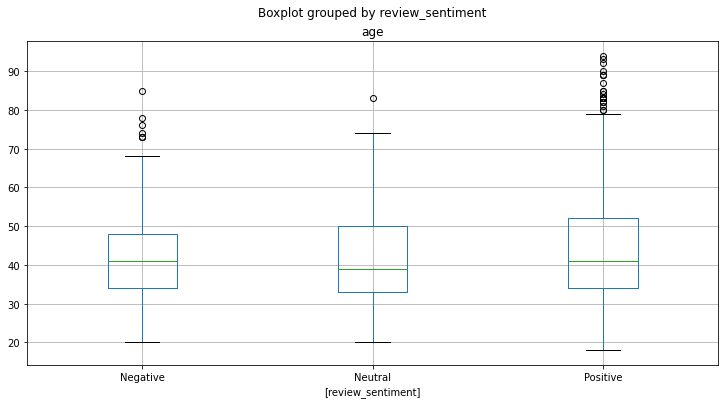

In [20]:
df[["age", "review_sentiment"]].boxplot(by="review_sentiment", figsize=(12, 6))

#### `items_bought` vs. `review_sentiment`

<AxesSubplot:title={'center':'items_bought'}, xlabel='[review_sentiment]'>

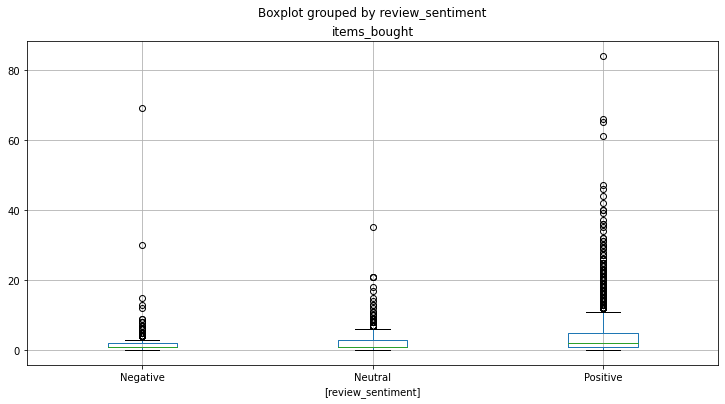

In [21]:
df[["items_bought", "review_sentiment"]].boxplot(by="review_sentiment", figsize=(12, 6))

## Preprocesamiento

## Encoding de la variable respuesta

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["review_sentiment"])
le.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [23]:
labels_encoded = le.transform(df["review_sentiment"])
labels_encoded

array([2, 2, 2, ..., 2, 2, 0])

In [24]:
le.inverse_transform(labels_encoded)

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [25]:
df["sentiment_enc"] = labels_encoded

### División de dataframe en `train` y `test`

In [26]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df.sentiment_enc, random_state=42)

In [27]:
df_train.shape, df_test.shape

((4506, 7), (1127, 7))

In [28]:
df_train.sentiment_enc.value_counts(normalize=True)

2    0.771638
1    0.124501
0    0.103862
Name: sentiment_enc, dtype: float64

In [29]:
df_test.sentiment_enc.value_counts(normalize=True)

2    0.771961
1    0.124224
0    0.103815
Name: sentiment_enc, dtype: float64

### Re-escalar variables

#### `StandardScaler`

In [30]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

df_train_final = df_train.copy()
df_test_final = df_test.copy()
cols_numeric = ["items_bought", "age"]

stan = StandardScaler()

stan.fit(df_train_final[cols_numeric])

df_train_final[cols_numeric] = stan.transform(df_train[cols_numeric])
df_train_final[cols_numeric].describe()

,items_bought,age
count,4.506000e+03,4.506000e+03
mean,3.350873e-17,2.436282e-16
std,1.000111e+00,1.000111e+00
min,-7.227924e-01,-2.017029e+00
25%,-5.157157e-01,-7.118799e-01
50%,-3.086390e-01,-1.408771e-01
75%,1.055145e-01,6.748413e-01
max,1.667165e+01,4.182430e+00


#### `Normalizer`

In [31]:
norm = Normalizer()

norm.fit(df_train[cols_numeric])

df_train_final[cols_numeric] = norm.transform(df_train[cols_numeric])
df_train_final[cols_numeric].describe()

,items_bought,age
count,4506.000000,4506.000000
mean,0.084336,0.990532
std,0.103202,0.032945
min,0.000000,0.316228
25%,0.025633,0.994843
50%,0.049938,0.998752
75%,0.101429,0.999671
max,0.948683,1.000000


#### `MinMaxScaler`

In [32]:
minmax = MinMaxScaler()

minmax.fit(df_train[cols_numeric])

df_train_final[cols_numeric] = minmax.transform(df_train[cols_numeric])
df_test_final[cols_numeric] = minmax.transform(df_test[cols_numeric])

df_train_final[cols_numeric].describe()

,items_bought,age
count,4506.000000,4506.000000
mean,0.041553,0.325356
std,0.057496,0.161322
min,0.000000,0.000000
25%,0.011905,0.210526
50%,0.023810,0.302632
75%,0.047619,0.434211
max,1.000000,1.000000


### Creación de variables a partir de las reseñas

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, stop_words="english")
vect.fit(df_train["review_text"])
vect.get_feature_names()[50:60]

['adore',
 'afraid',
 'ag',
 'ago',
 'agree',
 'airy',
 'allows',
 'altered',
 'amazing',
 'ankle']

In [34]:
train_text_features = vect.transform(df_train["review_text"])
train_text_features.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
train_text_features.shape

(4506, 1000)

In [36]:
df_train_final[vect.get_feature_names()] = train_text_features.toarray()

In [37]:
test_text_features = vect.transform(df_test["review_text"])
df_test_final[vect.get_feature_names()] = test_text_features.toarray()

### Creación de dataset y modelo de ML

In [38]:
columnas_innecesarias = ["clothing_id", "title", "review_text", "review_sentiment", "review_text", "sentiment_enc"]
X_train = df_train_final.drop(columnas_innecesarias, axis=1)
y_train = df_train_final["sentiment_enc"]

X_test = df_test_final.drop(columnas_innecesarias, axis=1)
y_test = df_test_final["sentiment_enc"]

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_preds = nb.predict(X_test)

In [41]:
(y_preds == y_test).mean()

0.7861579414374446